# Modelling Of SOFC
## ` Objective `- To analyse the effect of factors such as change in  `Temperature change` and `fuel flow rates` on Output voltage of SOFC.

### 1. Variation in Activation Losses
### 2. Variation in Ohmic Losses
### 3. Variation in Concetration Losses
### 4. Variation in Nenrst Voltage
### 5. Variation in Output Voltage
### 6. Variation in Power Output 
### 7. Voltage-Current variations



# Flow Chart

# 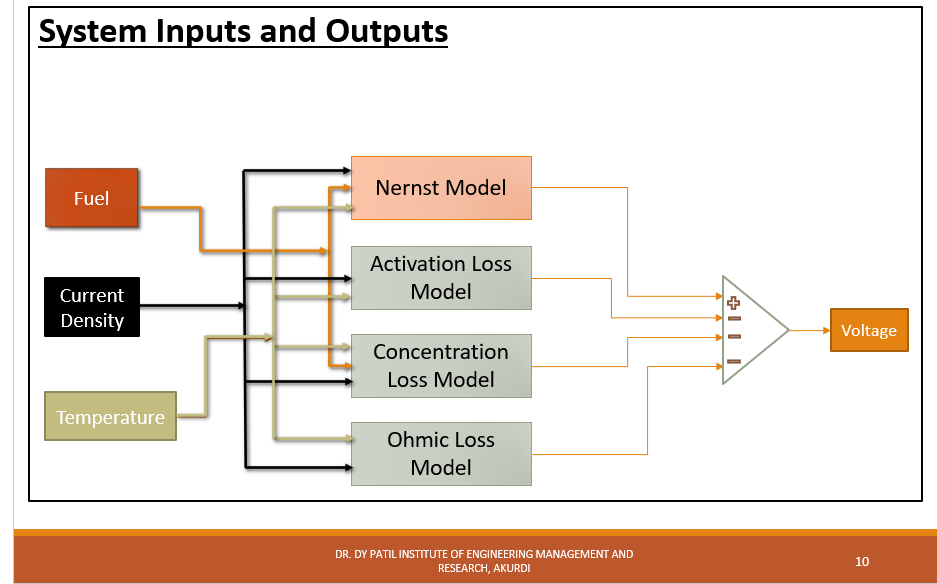

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

# Constants used in Model

In [2]:
I_L   = 0.14806 #input("Maximum Current density")               # Maximum current that can flow (10 A)
I0    = 2.00 #input("Exchange Current")                         # Exchange Current (say 2 A)
V_act = 0.1 #input("Activation Loss")                           # Activation Loss Not known(say 1)
r     = 5.00  #input("Internal Resistance")                     # Internal Resistance of SOFC(say 10 Ohm)

Y = 0.200                                                       # Constant used in Ohmic Losses
B = 2870.0                                                      # Constant used in Ohmic Losses

T0 = 973.0                                                      # Constant in K

E0 = 1.1                                                        # 1.1V Standerd Potential

R = 8.31400                                                     # Univeral Gas Constant in (J/mol-K)

F = 96486.0                                                     # Faradays Constant

alpha1 = 0.1                                                    # Approximate 0.1
alpha2 = 0.2                                                    # Approximate 0.1

n = 2.0                                                         # No. o moles

# Molar Valve constants for Hydrogen, Oxygen and Water
Kh2 = 0.843
Ko2 = 0.281
Kh2o = 2.52

# Response time for Hydrogen, Oxygen and Water
Th2 = 26.10
To2 = 2.91
Th2o = 78.3

Kr = 1.0/(8.0*F)


# 1. Inputs
## Fuel Flow Rates 
## `qh2 `- Flow rate of Hydrogen 
## `qo2 `- Flow rate of Oxygen
## Temperature Range - From `500K` to `1000K`

In [3]:
qh2 = 25.0                                        #[*np.arange(35.0, 50.0 , 2)]
qo2 = 25.0                                        #[*np.arange(35.0, 50.0 , 2)]
t   = [*np.arange(573,1223,50)]

print("Fuel flow Rate in ml/sec for Oxygen - ")
print(qh2)
print("Fuel flow Rate in ml/sec for Hydrogen - ")
print(qh2)
pd.DataFrame({"Temperature":t})

Fuel flow Rate in ml/sec for Oxygen - 
25.0
Fuel flow Rate in ml/sec for Hydrogen - 
25.0


,Temperature
0,573
1,623
2,673
3,723
4,773
5,823
6,873
7,923
8,973
9,1023


# 2. Output Current Density (I_fc )
### ` I0 ` is the exchange current
### ` αi ` is the coefficient of charge transfer
### ` n = 2 ` is the number of moles of electrons transferred

In [4]:
I_fc_list =[]
for T in t :
    first_term  =  np.exp((alpha1*n*F/(R*T))*V_act)
    second_term =  np.exp((-alpha2*n*F/(R*T))*V_act)
    I_fc =  I0*(first_term - second_term)
    I_fc_list.append(I_fc)

I_fc = 1.1459
print(I_fc_list)
pd.DataFrame({"Output Current":I_fc_list})

[2.1092214387958066, 1.953536481704905, 1.8202526760144448, 1.7046805340538738, 1.6033916918298328, 1.5138129109564165, 1.4339696540782063, 1.3623180696266854, 1.2976313952850194, 1.2389210484215443, 1.1853805072816463, 1.1363445694439243, 1.0912592310385367]


,Output Current
0,2.109221
1,1.953536
2,1.820253
3,1.704681
4,1.603392
5,1.513813
6,1.433970
7,1.362318
8,1.297631
9,1.238921


# 3. Partial Pressures
### •` qH2 ` is the fuel flow rate
### •` qO2 `is the oxygen flow rate 
### •` KH2 `,` KO2 `,` KH2O ` are the molar valve constants of hydrogen, oxygen and water respectively, 
### •` τH2 `,` τO2 `,` τH2O `, are the response times of hydrogen, oxygen and water respectively,
### •` τf ` is the fuel response time in seconds,
### •` Uopt ` is the optimum fuel utilization,
### •` rOH `is the ratio of hydrogen to oxygen
### •` Kr = 1/(8F)`


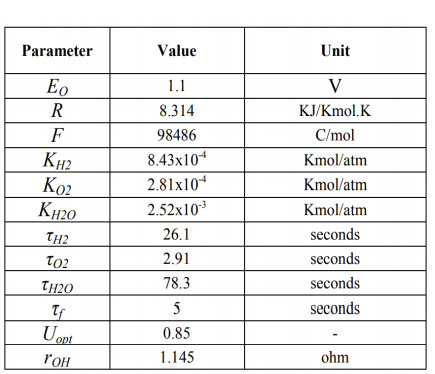

### Partial Pressure and found by following formulae.

In [5]:
Ph2_list = []
Po2_list = []
Ph2o_list = []

for I_fc in I_fc_list:
    item1 = ((1/Kh2)/(1+Th2))*(qh2 - 2*Kr*I_fc)
    Ph2_list.append(item1)

    
for I_fc in I_fc_list:
    item2 = ((1/Ko2)/(1+To2))*(qo2 - 2*Kr*I_fc) 
    Po2_list.append(item2)

for I_fc in I_fc_list:
    x =  (1/Kh2o)
    y = (1+Th2o)
    z = (2*Kr*I_fc)
    item3 = (x)/(y)*(z) 
    Ph2o_list.append(item3)
    
partial_pressure_vs_I_fc = pd.DataFrame({
                                          "I_fc Current":I_fc_list,
                                          "Ph2 - PP of Hydrogen" : Ph2_list,
                                           "Po2 - PP of Oxygen"  : Po2_list,
                                           "Ph2o - PP of Water" : Ph2o_list,
                                       })

print(partial_pressure_vs_I_fc )

    I_fc Current  Ph2 - PP of Hydrogen  Po2 - PP of Oxygen  Ph2o - PP of Water
0       2.109221              1.094317           22.753952        2.734791e-08
1       1.953536              1.094317           22.753952        2.532932e-08
2       1.820253              1.094317           22.753953        2.360118e-08
3       1.704681              1.094317           22.753953        2.210268e-08
4       1.603392              1.094317           22.753953        2.078938e-08
5       1.513813              1.094317           22.753953        1.962792e-08
6       1.433970              1.094317           22.753954        1.859268e-08
7       1.362318              1.094317           22.753954        1.766365e-08
8       1.297631              1.094317           22.753954        1.682493e-08
9       1.238921              1.094317           22.753954        1.606370e-08
10      1.185381              1.094317           22.753954        1.536950e-08
11      1.136345              1.094317           22.

# 4. Nernst Equation For (E_nernst)

#### E0 = 1.1 V is the standard potential
#### R = 8.314 kJ/ kmol .K is the universal gas constant
#### T = operating temperature of the fuel cell in kelvins
#### F = 96486 C/mol is the Faraday constant

    Temperature in K  Nernst Voltage in V
0                573             1.570712
1                623             1.613845
2                673             1.657133
3                723             1.700568
4                773             1.744142
5                823             1.787845
6                873             1.831672
7                923             1.875616
8                973             1.919671
9               1023             1.963833
10              1073             2.008096
11              1123             2.052456
12              1173             2.096908


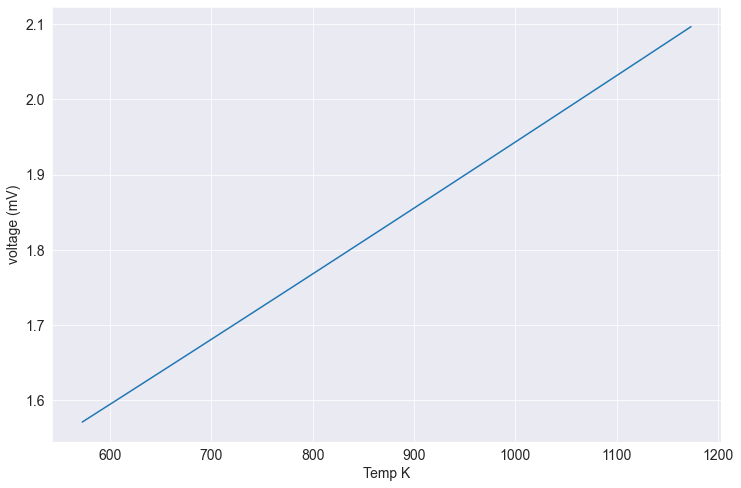

In [6]:
E_nernst = []

for T,Ph2,Po2,Ph2o in zip(t,Ph2_list,Po2_list,Ph2o_list):
    item = (E0 + (R*T/(2*F))*(math.log((Ph2*math.pow(Po2,0.5))/Ph2o)))
    E_nernst.append(item)

Temp_vs_Enernst = pd.DataFrame({
                                 "Temperature in K":t,
                                 "Nernst Voltage in V" : E_nernst,
                               })
print(Temp_vs_Enernst)

plt.figure(figsize=(12,8))
plt.plot(t,E_nernst)
plt.xlabel('Temp K')
plt.ylabel('voltage (mV)')

plt.grid(True)
plt.show()

# 5. Activation Losses 
### ` I0 ` is the exchange current 
### ` αi ` is the coefficient of charge transfer
### ` n = 2 ` is the number of moles of electrons transferred.

In [7]:
V_act = []

for T,I_fc in zip(t,I_fc_list):
    z = I_fc/(2.0*I0)
    item = ((R*T)/(2*alpha1*F))*(z+math.sqrt(1+math.pow(z,2)))
    V_act.append(item)

    Temperatures in K  Activation Losses in V
0                 573                0.409267
1                 623                0.429802
2                 673                0.450514
3                 723                0.471356
4                 773                0.492297
5                 823                0.513317
6                 873                0.534399
7                 923                0.555532
8                 973                0.576708
9                1023                0.597919
10               1073                0.619161
11               1123                0.640428
12               1173                0.661718


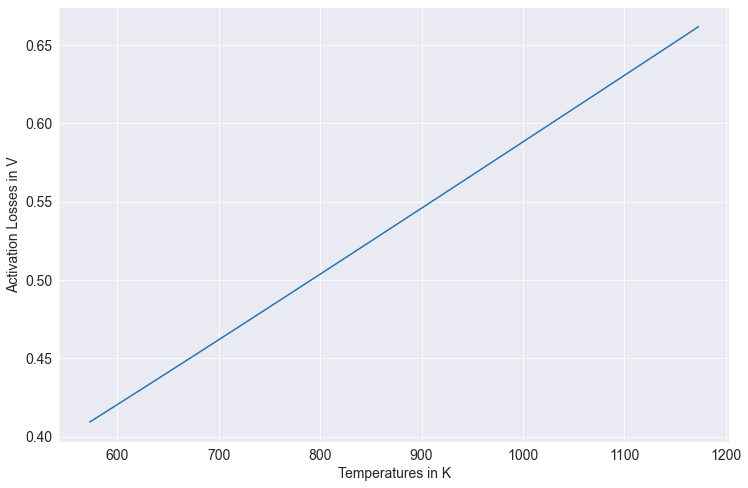

In [8]:
Temp_vs_Vact = pd.DataFrame({
                            "Temperatures in K":t,
                            "Activation Losses in V" : V_act,
                           })
 
print(Temp_vs_Vact)

plt.figure(figsize=(12,8))
plt.plot(t, V_act)

plt.xlabel("Temperatures in K")
plt.ylabel("Activation Losses in V")

plt.show()

# 6. Concentration Losses
### ` Cb ` is the concentration at the triple-phase boundary (tbp) where the gas, electrolyte,
### ` C∞ ` is the bulk concentration of reactant
### ` n ` is the number of moles of electrons participating in the reaction 
### `I L ` is the maximum possible current density of the cell at a given flowrate
### ` I fc ` is the given current density


In [9]:
V_conc = []
for T,I_fc in zip(t,I_fc_list):
    item = (R*T/(n*F))*(math.log(1+(I_fc/I_L)))
    V_conc.append(item)

    Temperature  Concentration Losses in V
0           573                   0.067255
1           623                   0.071206
2           673                   0.075021
3           723                   0.078709
4           773                   0.082280
5           823                   0.085741
6           873                   0.089098
7           923                   0.092358
8           973                   0.095526
9          1023                   0.098607
10         1073                   0.101607
11         1123                   0.104529
12         1173                   0.107377


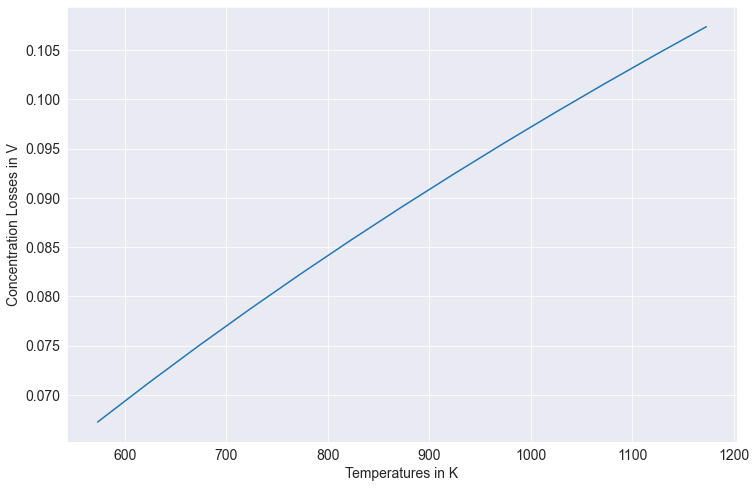

In [10]:
Temp_vs_Vconc = pd.DataFrame({
                              "Temperature":t,
                              "Concentration Losses in V" : V_conc,
                            })

print(Temp_vs_Vconc)

plt.figure(figsize=(12,8))
plt.plot(t,V_conc)

plt.xlabel("Temperatures in K")
plt.ylabel("Concentration Losses in V")

plt.show()

# 7. Ohmic Losses
### `T` is the fuel cell temperature
### `T0 = 973 K`
### `γ = 0.2 Ω,` and `β = −2870 K` are the constant coefficients of the fuel cell
### `r` is the internal resistance of the SOFC

    Temperature  Ohmic Losses in V
0           573           0.053815
1           623           0.074504
2           673           0.097753
3           723           0.122948
4           773           0.149496
5           823           0.176858
6           873           0.204566
7           923           0.232228
8           973           0.259526
9          1023           0.286210
10         1073           0.312086
11         1123           0.337012
12         1173           0.360890


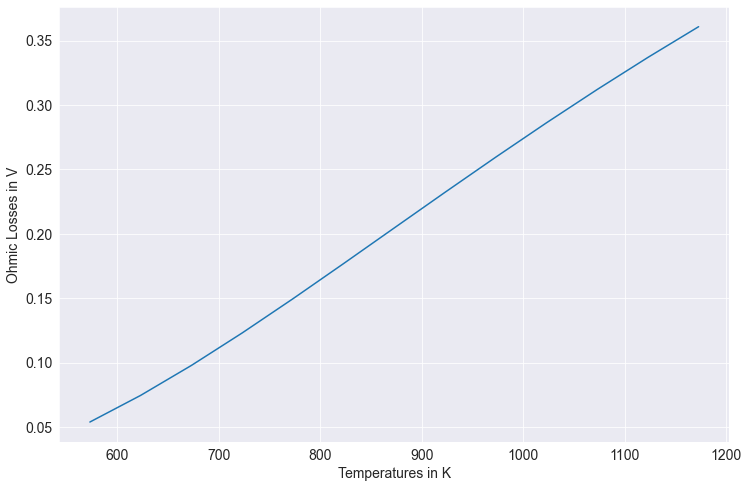

In [11]:
V_ohmic = []
for T,I_fc in zip(t,I_fc_list):
    item = (Y*(np.exp(B*((1/T0)-(1/T)))))*I_fc
    V_ohmic.append(item)
    
Temp_vs_Vohm = pd.DataFrame({
                             "Temperature":t,
                             "Ohmic Losses in V" : V_ohmic,
                            })
print(Temp_vs_Vohm)

plt.figure(figsize=(12,8))
plt.plot(t,V_ohmic)

plt.xlabel("Temperatures in K")
plt.ylabel("Ohmic Losses in V")

plt.show()

# 8. Net Output Voltage 

## Output Voltage = Nernst Voltage – (Activation Loss + Concentration loss + Ohmic Loss )

## `V_out = E_nernst – (V_act + V_con + V_ohmic)`


    Temperature  Output Voltage in V
0           573             1.040376
1           623             1.038333
2           673             1.033846
3           723             1.027555
4           773             1.020068
5           823             1.011930
6           873             1.003609
7           923             0.995498
8           973             0.987911
9          1023             0.981097
10         1073             0.975242
11         1123             0.970486
12         1173             0.966923


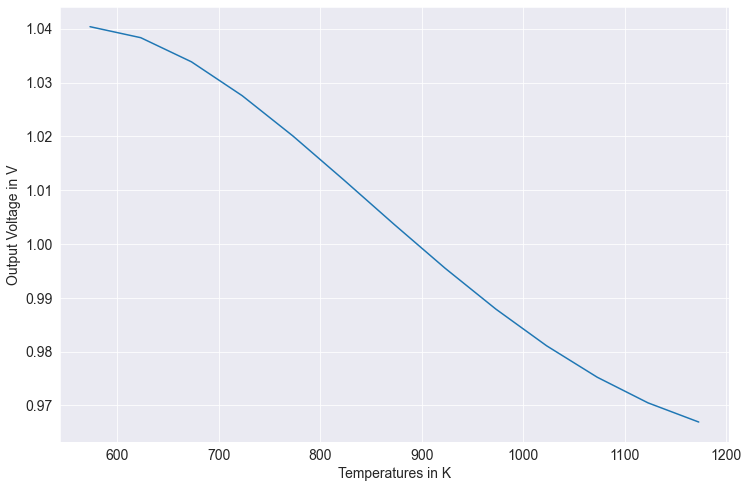

In [12]:

a = np.add(V_ohmic, V_conc)
b = np.add(a,V_act)

V_out = np.subtract(E_nernst, b)

Temp_vs_V_out = pd.DataFrame({
                             "Temperature":t,
                             "Output Voltage in V" : V_out,
                            })
print(Temp_vs_V_out)

plt.figure(figsize=(12,8))
plt.plot(t,V_out)

plt.xlabel("Temperatures in K")
plt.ylabel("Output Voltage in V")

plt.show()

# 9. Power in SOFC

    Temperature     Power
0           573  2.194383
1           623  2.028420
2           673  1.881861
3           723  1.751654
4           773  1.635569
5           823  1.531872
6           873  1.439145
7           923  1.356185
8           973  1.281945
9          1023  1.215501
10         1073  1.156033
11         1123  1.102807
12         1173  1.055164


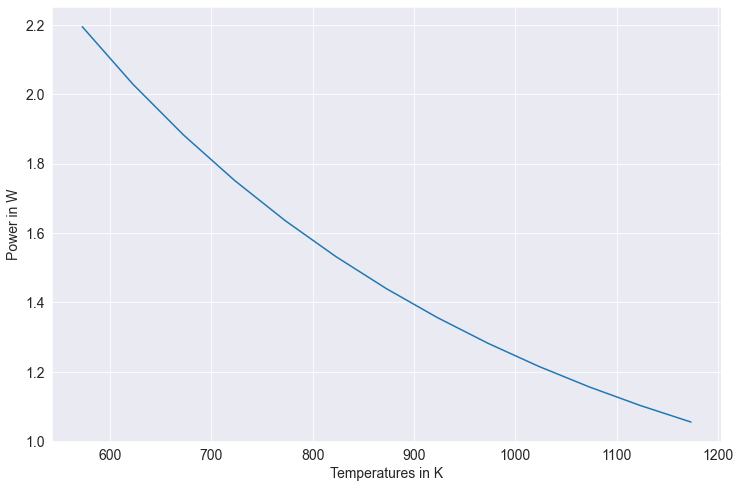

In [13]:
power = []
for Ifc, Vout in zip(I_fc_list,V_out):
    power.append(Ifc*Vout)
    
Temp_vs_power = pd.DataFrame({
                             "Temperature":t,
                             "Power" : power,
                            })
print(Temp_vs_power)

plt.figure(figsize=(12,8))
plt.plot(t,power)

plt.xlabel("Temperatures in K")
plt.ylabel("Power in W")

plt.show()

# Summary

## 1. Voltages vs Temperatures

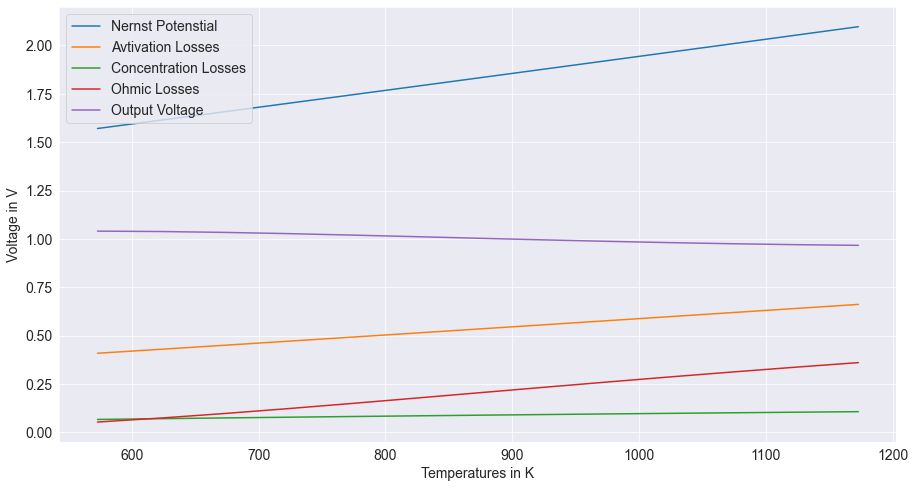

In [14]:
plt.figure(figsize=(15,8))

plt.plot(t,E_nernst, label="Nernst Potenstial")

plt.plot(t, V_act, label="Avtivation Losses")

plt.plot(t,V_conc, label="Concentration Losses")

plt.plot(t,V_ohmic, label="Ohmic Losses")

plt.plot(t,V_out, label="Output Voltage")



plt.xlabel("Temperatures in K")
plt.ylabel("Voltage in V")

plt.legend()

plt.show()

## 2. Current vs Voltage

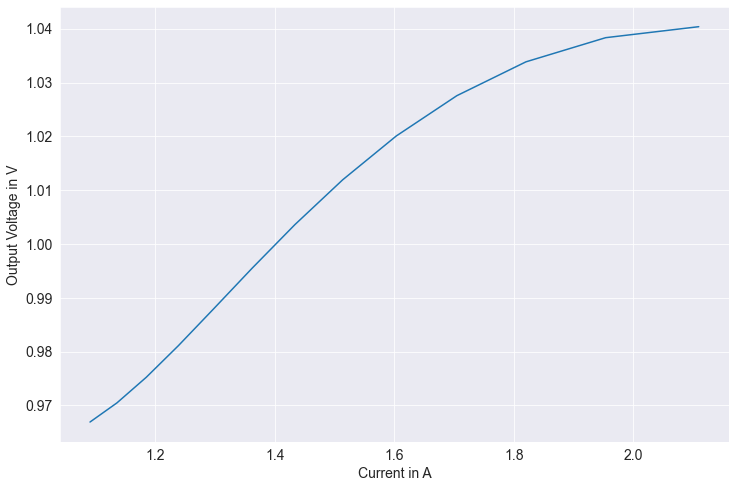

In [15]:
plt.figure(figsize=(12,8))
plt.plot(I_fc_list,V_out)

plt.xlabel('Current in A')
plt.ylabel('Output Voltage in V')
plt.show()

## 3. Power vs Temperature

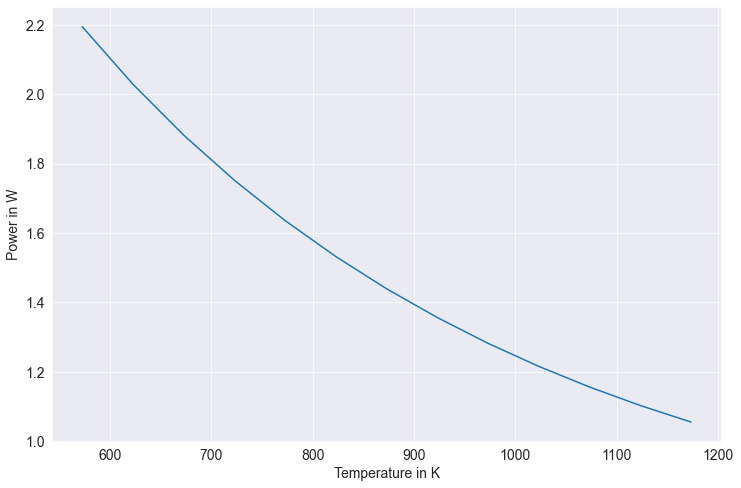

In [16]:
plt.figure(figsize=(12,8))
plt.plot(t,power)

plt.xlabel('Temperature in K')
plt.ylabel('Power in W')
plt.show()

# Data Chart

In [17]:
data = pd.DataFrame({
    "Temperature (K)" :t,
    "Nernst Voltage(V)":E_nernst,
    "Activation Losses(V)":V_act,
    "Concentration Losses(V)":V_conc,
    "Ohmic Losses(V)":V_ohmic,
    "Current Density":I_fc_list,
    "Output Votage(V)":V_out,
    "Power (W)":power
})

data

,Temperature (K),Nernst Voltage(V),Activation Losses(V),Concentration Losses(V),Ohmic Losses(V),Current Density,Output Votage(V),Power (W)
0,573,1.570712,0.409267,0.067255,0.053815,2.109221,1.040376,2.194383
1,623,1.613845,0.429802,0.071206,0.074504,1.953536,1.038333,2.028420
2,673,1.657133,0.450514,0.075021,0.097753,1.820253,1.033846,1.881861
3,723,1.700568,0.471356,0.078709,0.122948,1.704681,1.027555,1.751654
4,773,1.744142,0.492297,0.082280,0.149496,1.603392,1.020068,1.635569
5,823,1.787845,0.513317,0.085741,0.176858,1.513813,1.011930,1.531872
6,873,1.831672,0.534399,0.089098,0.204566,1.433970,1.003609,1.439145
7,923,1.875616,0.555532,0.092358,0.232228,1.362318,0.995498,1.356185
8,973,1.919671,0.576708,0.095526,0.259526,1.297631,0.987911,1.281945
9,1023,1.963833,0.597919,0.098607,0.286210,1.238921,0.981097,1.215501


In [18]:
print(np.arange(523, 1023, 50))

[523 573 623 673 723 773 823 873 923 973]
